In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import sklearn.metrics as skl
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score

import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url='https://raw.githubusercontent.com/FazlyRabbiBD/Data-Science-Book/master/data-fuel-consumption.csv'
df = pd.read_csv(url)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [4]:
statMDL=smf.ols('CO2EMISSIONS~ENGINESIZE+CYLINDERS+FUELCONSUMPTION_CITY+FUELCONSUMPTION_HWY+FUELCONSUMPTION_COMB+FUELCONSUMPTION_COMB_MPG', data= df).fit()
print(statMDL.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     1419.
Date:                Wed, 20 May 2020   Prob (F-statistic):               0.00
Time:                        07:16:10   Log-Likelihood:                -4766.4
No. Observations:                1067   AIC:                             9547.
Df Residuals:                    1060   BIC:                             9582.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [0]:
x = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB_MPG']]
y = df['CO2EMISSIONS']

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)
linreg = LinearRegression()
linreg.fit(x_train, y_train)

print("Intercept:", linreg.intercept_)
coeff_df = pd.DataFrame(linreg.coef_, x.columns, columns=['Coefficient'])
coeff_df

Intercept: 307.1168046918609


,Coefficient
ENGINESIZE,11.111728
CYLINDERS,6.343378
FUELCONSUMPTION_COMB_MPG,-4.730592


In [30]:
predictions = linreg.predict(x_test)
pdf = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
pdf

,Actual,Predicted
331,259,304.759227
467,290,281.106266
938,147,129.112612
60,281,293.507121
71,380,369.487642
...,...,...
628,202,203.334824
441,380,336.335921
872,253,264.406243
623,253,236.163068


In [8]:
print('Coefficients:', linreg.coef_)
print('Intercept:', linreg.intercept_)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
accuracy = linreg.score(x_test,y_test)
print('AccuracyII:',accuracy*100,'%')
print('R2:', r2_score(y_test, predictions))

Coefficients: [11.11172826  6.34337788 -4.73059216]
Intercept: 307.1168046918609
MAE: 14.528021284008476
MSE: 487.3839241006477
RMSE: 22.0767734078295
AccuracyII: 88.53480655959554 %
R2: 0.8853480655959554


In [9]:
print("Train set Accuracy: ", r2_score(y_train, linreg.predict(x_train)))
print("Test set Accuracy: ", r2_score(y_test, predictions))

Train set Accuracy:  0.8827636444239391
Test set Accuracy:  0.8853480655959554


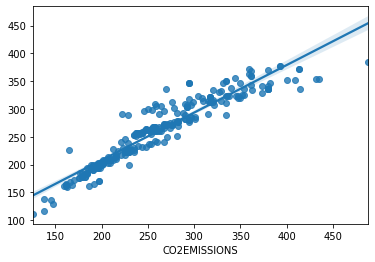

In [10]:
sns.regplot(x=y_test, y=predictions)

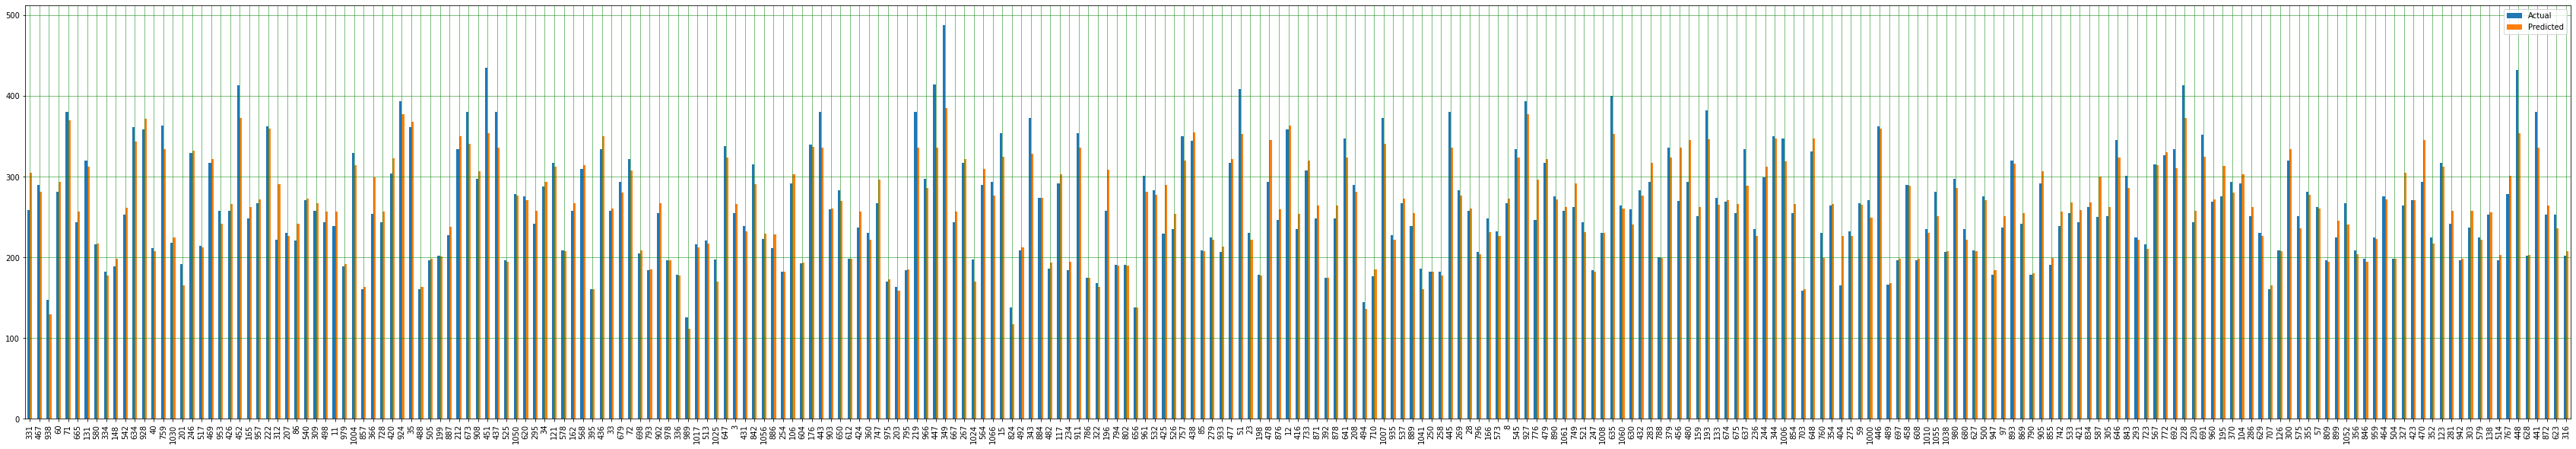

In [11]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

#actual vs predicted plot
df2.plot(kind='bar',figsize=(60,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [0]:
new_observation = [[4,4, 6]]
linreg.predict(new_observation)

array([348.55367627])

In [28]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
x_ = poly.fit_transform(x)
x_test_ = poly.fit_transform(x_test)

polymodel = LinearRegression()
polymodel.fit(x_, y)
polymodel.coef_

array([ 4.44270236e-06, -1.48373122e+02, -4.95101784e+03, -7.63737561e+02,
        1.20832004e+03, -1.43345638e+03,  3.38010985e+01,  1.11702920e+03,
        2.58285709e+02,  1.62465958e+01, -3.55483381e+01, -9.05552100e+01,
       -4.83179979e+01,  1.39268272e+02,  5.63087278e+01, -1.21631452e+00,
       -8.10510999e+01, -4.35871796e+01, -4.08338041e+00, -1.20364667e-01,
       -6.06647115e+00,  1.71751448e+01,  6.32787988e-01, -1.22427800e+01,
        1.74655598e+00,  4.87944052e-01,  1.76882558e+00, -2.55016701e+00,
       -5.89106642e-01,  1.40966251e-02,  1.15322654e+00,  1.52710651e+00,
        4.37171987e-01,  1.64465380e-02,  1.54454855e-04])

In [0]:
predictions1 = polymodel.predict(x_test_)

In [27]:
print('Coefficients:', polymodel.coef_)
print('Intercept:', polymodel.intercept_)
print('MAE:', metrics.mean_absolute_error(y_test, predictions1))
print('MSE:', metrics.mean_squared_error(y_test, predictions1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions1)))
accuracy = polymodel.score(x_test_,y_test)
print('AccuracyII:',accuracy*100,'%')

Coefficients: [ 2.47034889e+00  1.63647111e+04  6.16510949e+03  2.97157974e+04
 -1.10971391e+04  1.85432419e+04  2.14660844e+04  7.55721313e+03
 -2.23282995e+04 -1.69527208e+03 -1.71952772e+04 -1.00960458e+03
  1.34575991e+04  1.51281179e+04 -3.02097152e+04  4.98250574e+01
 -9.25211308e+03  1.30861061e+04  5.50066582e+02  5.20745760e+01
 -3.43234398e+03  1.68435434e+04  1.26266562e+02 -8.37443872e+03
 -5.89919600e+03 -1.24596432e+02 -3.79154375e+03  9.74539773e+03
  2.24111148e+02 -6.65608165e+00  2.54765741e+03 -3.48077573e+03
 -1.20545025e+02 -1.42531688e+01 -6.88091708e-01  1.73068254e+03
 -5.59136360e+03  3.42746013e+02  5.82743411e+03 -8.97654404e+02
  3.94410614e+00 -4.29085735e+03  1.74897520e+03  8.58081336e+00
  1.37293781e+00  2.36232074e+03 -1.61986328e+03 -3.58104289e+01
 -3.97475736e-01  4.70613652e-02 -5.65680552e+02  4.68491630e+02
  1.34789132e+01  1.30236678e+00  1.76856525e-01  3.24747387e-03
  5.39335505e+01 -3.79170621e+02 -1.85220133e+01  9.05277228e+02
  4.1359798